In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tools import *
pd.set_option("display.max_colwidth",None)
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
pd.options.display.precision = 5
plt.rcParams.update(plt.rcParamsDefault)
sns.set_style('white')

In [56]:
import datetime
from time import process_time

# Extra library imports
from PIL import Image
from scipy.optimize import minimize
import scipy.ndimage as ndi
import pandas as pd

In [57]:
import importlib
import tools
importlib.reload(tools)

<module 'tools' from 'c:\\Users\\moesl\\Documents\\ISEP\\A2\\IA ET OPTIMISATION\\projet\\Data-Analysis-AI-Project\\tools.py'>

In [58]:
pd.set_option("display.max_columns", None);
pd.set_option('display.max_rows', 50);

In [59]:
path = 'data/'
data = pd.read_csv(path + "processed_data.csv",header=0,index_col='ID')
print(data.shape)
data.head(10)

(249, 138)


,bug_type,species,nb_pixels_ratio,image_symmetry_index,mask_bb_symmetry_index,orthogal_lines_ratio,roundness,mean_centroid_distance,std_centroid_distance,max_centroid_distance,min_centroid_distance,skewness_centroid_distance,kurtosis_centroid_distance,aspect_ratio,mask_area,mask_perimeter,mask_compactness,hull_area,hull_to_insect_area_ratio,hull_convexity,hull_triangle_similarity,ellipse_angle,ellipse_axis_ratio,ellipse_eccentricity,ellipse_variance,axis_least_inertia_x,axis_least_inertia_y,rectangularity,body_parts_mean_length,body_parts_max_length,body_parts_std_length,body_parts_spread,rest_entropy,mask_entropy,red_mask_min,red_rest_min,red_mask_max,red_rest_max,red_mask_mean,red_rest_mean,red_mask_median,red_rest_median,red_mask_std,red_rest_std,red_mask_q1,red_rest_q1,red_mask_q3,red_rest_q3,green_mask_min,green_rest_min,green_mask_max,green_rest_max,green_mask_mean,green_rest_mean,green_mask_median,green_rest_median,green_mask_std,green_rest_std,green_mask_q1,green_rest_q1,green_mask_q3,green_rest_q3,blue_mask_min,blue_rest_min,blue_mask_max,blue_rest_max,blue_mask_mean,blue_rest_mean,blue_mask_median,blue_rest_median,blue_mask_std,blue_rest_std,blue_mask_q1,blue_rest_q1,blue_mask_q3,blue_rest_q3,hue_mask_min,hue_rest_min,hue_mask_max,hue_rest_max,hue_mask_mean,hue_rest_mean,hue_mask_median,hue_rest_median,hue_mask_std,hue_rest_std,hue_mask_q1,hue_rest_q1,hue_mask_q3,hue_rest_q3,saturation_mask_min,saturation_rest_min,saturation_mask_max,saturation_rest_max,saturation_mask_mean,saturation_rest_mean,saturation_mask_median,saturation_rest_median,saturation_mask_std,saturation_rest_std,saturation_mask_q1,saturation_rest_q1,saturation_mask_q3,saturation_rest_q3,value_mask_min,value_rest_min,value_mask_max,value_rest_max,value_mask_mean,value_rest_mean,value_mask_median,value_rest_median,value_mask_std,value_rest_std,value_mask_q1,value_rest_q1,value_mask_q3,value_rest_q3,fourier_descriptor_real_0,fourier_descriptor_imag_0,fourier_descriptor_real_1,fourier_descriptor_imag_1,fourier_descriptor_real_2,fourier_descriptor_imag_2,fourier_descriptor_real_3,fourier_descriptor_imag_3,fourier_descriptor_real_4,fourier_descriptor_imag_4,fourier_descriptor_real_5,fourier_descriptor_imag_5,fourier_descriptor_real_6,fourier_descriptor_imag_6,fourier_descriptor_real_7,fourier_descriptor_imag_7,fourier_descriptor_real_8,fourier_descriptor_imag_8,fourier_descriptor_real_9,fourier_descriptor_imag_9
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bee,Apis mellifera,0.00720,65.84252,70.05927,0,0.04671,245.17234,55.34848,362.54864,127.67198,-0.05793,-0.81783,0.81106,172773,6818,0.04671,265227.5,0.65141,0.28697,0.82641,4.10052,0.87838,0.47797,0.09994,-0.84075,0.54143,0.50264,434.17916,1566.46927,545.07894,252.45220,7.46081,6.96751,5,1,203,255,66.75052,107.40358,54,128,47.32937,61.07331,26,43,99,156,3,2,199,255,53.38703,105.37812,36,123,44.41560,58.06868,17,49,81,151,0,0,186,255,38.78619,84.57307,23,85,35.29870,57.19889,13,28,54,132,0,0,178,179,22.95534,42.77689,14,27,35.49440,46.07638,10,21,20,38,0,0,255,255,113.96383,66.07887,115.0,51,41.47447,50.35127,83,26,143,102,5,3,203,255,66.82641,109.17600,55,128,47.29504,59.73760,26,50,99,156,0.80235,0.59685,-0.02535,-0.00863,-0.01372,0.00637,-0.00183,-0.00426,-0.01064,0.00436,-0.00170,0.00806,-0.00169,0.00229,-0.00351,0.00471,-0.00095,0.00136,-0.00231,0.00099
2,Bee,Apis mellifera,0.00831,68.89684,40.14367,0,0.04844,279.99803,85.16388,478.80295,108.00951,-0.06321,-0.61658,0.65248,199332,7191,0.04844,350945.5,0.56799,0.32091,0.99793,5.41676,0.56809,0.82297,0.09049,-0.96574,0.25950,0.42684,632.80009,4440.11845,1357.73020,350.97635,7.47115,6.81133,2,0,248,255,62.01555,101.10645,54,120,41.36733,61.73756,25,36,95,151,2,1,251,255,50.14088,98.70830,32,116,41.82911,58.44320,16,42,81,145,0,0,244,255,34.09561,74.86207,18,65,33.49315,56.03765,10,24,53,120,0,0,179,179,24.34423,40.25772,16,27,34.25677,43.17561,11,22,23,36,0

# Structure du dataset

In [60]:
print('Dimensions: ', data.shape)

Dimensions:  (249, 138)


In [61]:
data.dtypes

bug_type                      object
species                       object
nb_pixels_ratio              float64
image_symmetry_index         float64
mask_bb_symmetry_index       float64
                              ...   
fourier_descriptor_imag_7    float64
fourier_descriptor_real_8    float64
fourier_descriptor_imag_8    float64
fourier_descriptor_real_9    float64
fourier_descriptor_imag_9    float64
Length: 138, dtype: object

In [62]:
print(data.columns)


Index(['bug_type', 'species', 'nb_pixels_ratio', 'image_symmetry_index',
       'mask_bb_symmetry_index', 'orthogal_lines_ratio', 'roundness',
       'mean_centroid_distance', 'std_centroid_distance',
       'max_centroid_distance',
       ...
       'fourier_descriptor_real_5', 'fourier_descriptor_imag_5',
       'fourier_descriptor_real_6', 'fourier_descriptor_imag_6',
       'fourier_descriptor_real_7', 'fourier_descriptor_imag_7',
       'fourier_descriptor_real_8', 'fourier_descriptor_imag_8',
       'fourier_descriptor_real_9', 'fourier_descriptor_imag_9'],
      dtype='object', length=138)


In [63]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
print(data.columns)  # Verify the new column names


Index(['bug_type', 'species', 'nb_pixels_ratio', 'image_symmetry_index',
       'mask_bb_symmetry_index', 'orthogal_lines_ratio', 'roundness',
       'mean_centroid_distance', 'std_centroid_distance',
       'max_centroid_distance',
       ...
       'fourier_descriptor_real_5', 'fourier_descriptor_imag_5',
       'fourier_descriptor_real_6', 'fourier_descriptor_imag_6',
       'fourier_descriptor_real_7', 'fourier_descriptor_imag_7',
       'fourier_descriptor_real_8', 'fourier_descriptor_imag_8',
       'fourier_descriptor_real_9', 'fourier_descriptor_imag_9'],
      dtype='object', length=138)


In [64]:
for col in ['bug_type', 'species']:  # Adjusted to normalized names
    data[col] = data[col].astype('string')
print(data.dtypes)  # Check data types to confirm the changes


bug_type                     string[python]
species                      string[python]
nb_pixels_ratio                     float64
image_symmetry_index                float64
mask_bb_symmetry_index              float64
                                  ...      
fourier_descriptor_imag_7           float64
fourier_descriptor_real_8           float64
fourier_descriptor_imag_8           float64
fourier_descriptor_real_9           float64
fourier_descriptor_imag_9           float64
Length: 138, dtype: object


In [65]:
#Créer listes des variables continues et discrètes
dis_cols = ['bug type','species']

In [66]:
for col in dis_cols:
    if col in data.columns:
        print(f"Value counts for {col}:")
        print(data[col].value_counts())
    else:
        print(f"Column {col} not found in DataFrame.")


Column bug type not found in DataFrame.
Value counts for species:
species
Bombus hortorum                             71
Apis mellifera                              58
Bombus pascuorum                            25
Anthidium manicatum                         19
Megachile centuncularis                     17
Eristalis                                    9
Vespula germanica                            8
Anthidium                                    6
Macroglossum stellatarum                     5
Andrenidae                                   4
Pieris rapae                                 4
Aglais urticae                               3
Thyreus                                      3
Bombus hortorum x2                           2
Macropis fulvipes ?                          2
Xylocopa                                     2
Polyommatus icarus                           2
Bombus lapidarius                            2
Trachusa byssina                             2
Aeshnidae                        

# Visualisations optionnelles

In [67]:
# Ensure all column names are lower case and underscores replace spaces for consistency
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Filter dis_cols to include only those that exist in data.columns
dis_cols = [col for col in dis_cols if col in data.columns]
print("Filtered dis_cols:", dis_cols)


Filtered dis_cols: ['species']


In [68]:
plot_nunique_values(data[dis_cols])

In [69]:
get_missing(data)

,Nom de colonne,Pourcentage de NA
bug_type,bug_type,0.0
saturation_mask_q1,saturation_mask_q1,0.0
saturation_rest_std,saturation_rest_std,0.0
saturation_mask_std,saturation_mask_std,0.0
saturation_rest_median,saturation_rest_median,0.0
...,...,...
red_rest_q3,red_rest_q3,0.0
green_mask_min,green_mask_min,0.0
green_rest_min,green_rest_min,0.0
red_rest_std,red_rest_std,0.0


In [70]:
data.describe()

,nb_pixels_ratio,image_symmetry_index,mask_bb_symmetry_index,orthogal_lines_ratio,roundness,mean_centroid_distance,std_centroid_distance,max_centroid_distance,min_centroid_distance,skewness_centroid_distance,kurtosis_centroid_distance,aspect_ratio,mask_area,mask_perimeter,mask_compactness,hull_area,hull_to_insect_area_ratio,hull_convexity,hull_triangle_similarity,ellipse_angle,ellipse_axis_ratio,ellipse_eccentricity,ellipse_variance,axis_least_inertia_x,axis_least_inertia_y,rectangularity,body_parts_mean_length,body_parts_max_length,body_parts_std_length,body_parts_spread,rest_entropy,mask_entropy,red_mask_min,red_rest_min,red_mask_max,red_rest_max,red_mask_mean,red_rest_mean,red_mask_median,red_rest_median,red_mask_std,red_rest_std,red_mask_q1,red_rest_q1,red_mask_q3,red_rest_q3,green_mask_min,green_rest_min,green_mask_max,green_rest_max,green_mask_mean,green_rest_mean,green_mask_median,green_rest_median,green_mask_std,green_rest_std,green_mask_q1,green_rest_q1,green_mask_q3,green_rest_q3,blue_mask_min,blue_rest_min,blue_mask_max,blue_rest_max,blue_mask_mean,blue_rest_mean,blue_mask_median,blue_rest_median,blue_mask_std,blue_rest_std,blue_mask_q1,blue_rest_q1,blue_mask_q3,blue_rest_q3,hue_mask_min,hue_rest_min,hue_mask_max,hue_rest_max,hue_mask_mean,hue_rest_mean,hue_mask_median,hue_rest_median,hue_mask_std,hue_rest_std,hue_mask_q1,hue_rest_q1,hue_mask_q3,hue_rest_q3,saturation_mask_min,saturation_rest_min,saturation_mask_max,saturation_rest_max,saturation_mask_mean,saturation_rest_mean,saturation_mask_median,saturation_rest_median,saturation_mask_std,saturation_rest_std,saturation_mask_q1,saturation_rest_q1,saturation_mask_q3,saturation_rest_q3,value_mask_min,value_rest_min,value_mask_max,value_rest_max,value_mask_mean,value_rest_mean,value_mask_median,value_rest_median,value_mask_std,value_rest_std,value_mask_q1,value_rest_q1,value_mask_q3,value_rest_q3,fourier_descriptor_real_0,fourier_descriptor_imag_0,fourier_descriptor_real_1,fourier_descriptor_imag_1,fourier_descriptor_real_2,fourier_descriptor_imag_2,fourier_descriptor_real_3,fourier_descriptor_imag_3,fourier_descriptor_real_4,fourier_descriptor_imag_4,fourier_descriptor_real_5,fourier_descriptor_imag_5,fourier_descriptor_real_6,fourier_descriptor_imag_6,fourier_descriptor_real_7,fourier_descriptor_imag_7,fourier_descriptor_real_8,fourier_descriptor_imag_8,fourier_descriptor_real_9,fourier_descriptor_imag_9
count,249.00000,249.00000,249.00000,249.0,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,2.49000e+02,249.00000,249.00000,2.49000e+02,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.0,249.0,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000,249.00000
mean,0.02291,41.20895,50.60318,0.0,0.07757,424.99955,120.97559,694.67362,174.95151,0.06733,-0.58150,0.81880,5.49395e+05,9506.81526,0.07757,8.17209e+05,0.69031,0.36113,0.78025,88.45125,0.71592,0.67233,0.09478,-0.49610,-0.43336,0.46988

In [71]:
print('maxO3' in data.columns)  # This will print True if 'maxO3' exists, False otherwise


False


In [72]:
print(data.columns)


Index(['bug_type', 'species', 'nb_pixels_ratio', 'image_symmetry_index',
       'mask_bb_symmetry_index', 'orthogal_lines_ratio', 'roundness',
       'mean_centroid_distance', 'std_centroid_distance',
       'max_centroid_distance',
       ...
       'fourier_descriptor_real_5', 'fourier_descriptor_imag_5',
       'fourier_descriptor_real_6', 'fourier_descriptor_imag_6',
       'fourier_descriptor_real_7', 'fourier_descriptor_imag_7',
       'fourier_descriptor_real_8', 'fourier_descriptor_imag_8',
       'fourier_descriptor_real_9', 'fourier_descriptor_imag_9'],
      dtype='object', length=138)


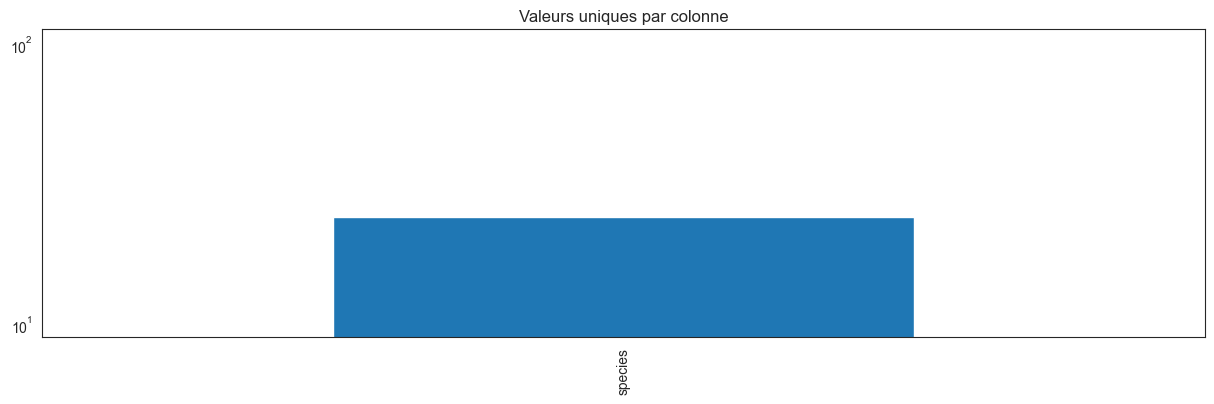

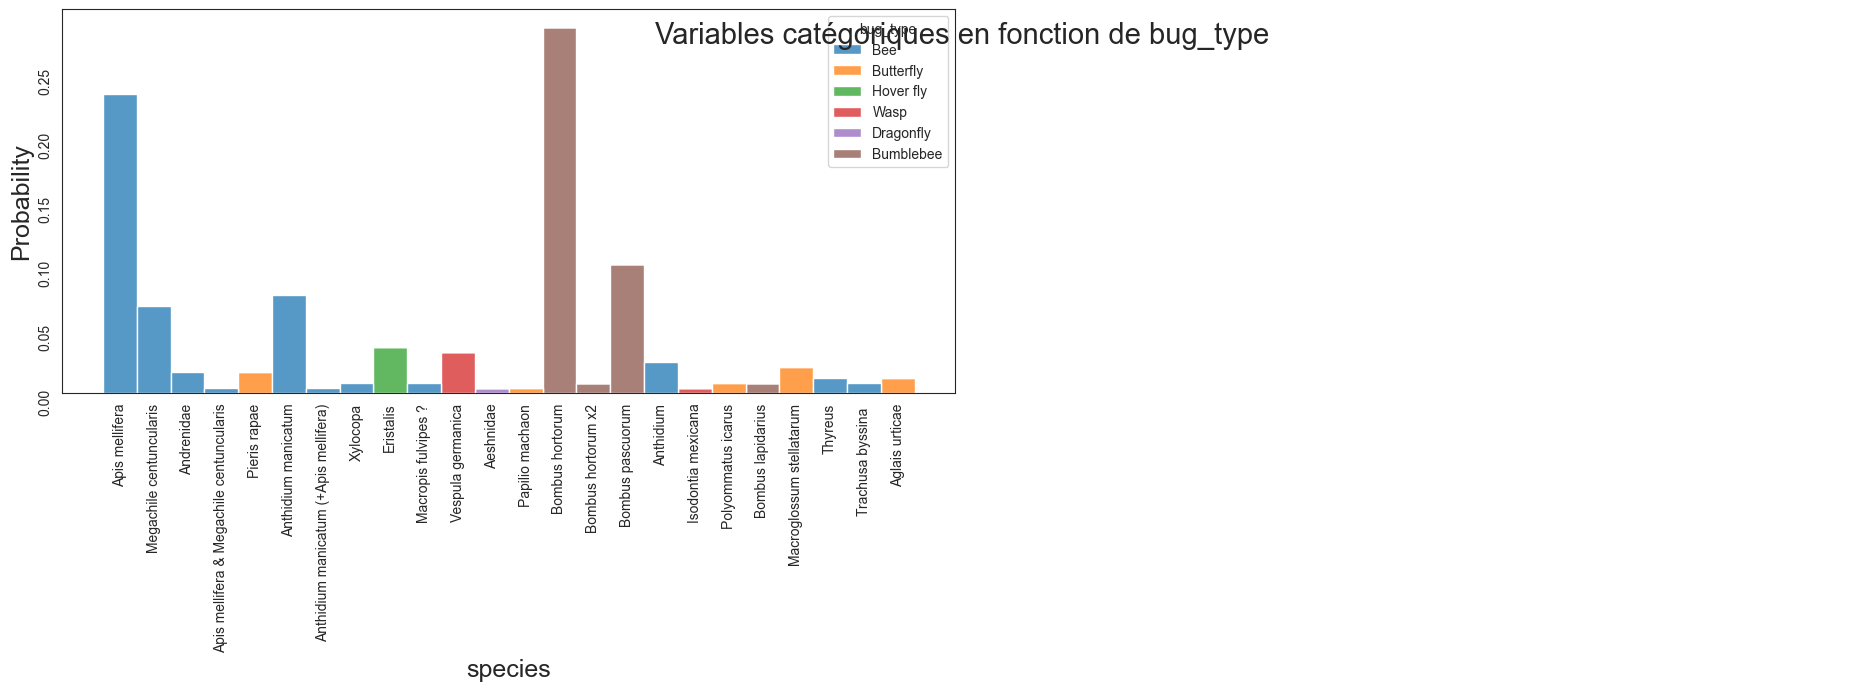

AttributeError: 'NoneType' object has no attribute 'suptitle'

In [73]:
fig2 = cat_plot(data, dis_cols, "bug_type", "classification")
fig2.suptitle("Variables catégoriques en fonction de classification", fontsize=20, y=0.95)
fig3 = num_plot(data, cont_cols, "bug_type", "classification")
fig3.suptitle("Variables numériques en fonction de bug_type", fontsize=20, y=0.92)
plt.show()

In [ ]:
plotcorrmatrix(data[cont_cols])

In [ ]:
sns.pairplot(data, height=1.5, plot_kws={"s": 3.5, "alpha": 1})
plt.show()

In [ ]:
fig1 = distribution(data, data.columns)
plt.show()

# Distribution between different types of bugs

# PCA Projection

Step 1: Preparing the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame and it's already cleaned and contains only numeric features
# If 'data' includes non-numeric columns, you'll need to drop or encode them
numeric_cols = data.select_dtypes(include=[np.number]).columns  # This selects only numeric columns
scaled_df = StandardScaler().fit_transform(data[numeric_cols])


Step 2: Applying PCA

In [ ]:
from sklearn.decomposition import PCA

# Creating a PCA object with the number of components you wish to retain
pca = PCA(n_components=2)

# Fitting and transforming the scaled data to reduce dimensionality
principalComponents = pca.fit_transform(scaled_df)

# Explained variance can tell you how much information (variance) can be attributed to each of the principal components
explained_variance = pca.explained_variance_ratio_
print("Explained Variance per Principal Component:", explained_variance)


Explained Variance per Principal Component: [0.16455292 0.0988456 ]


Step 3: Visualizing PCA Results

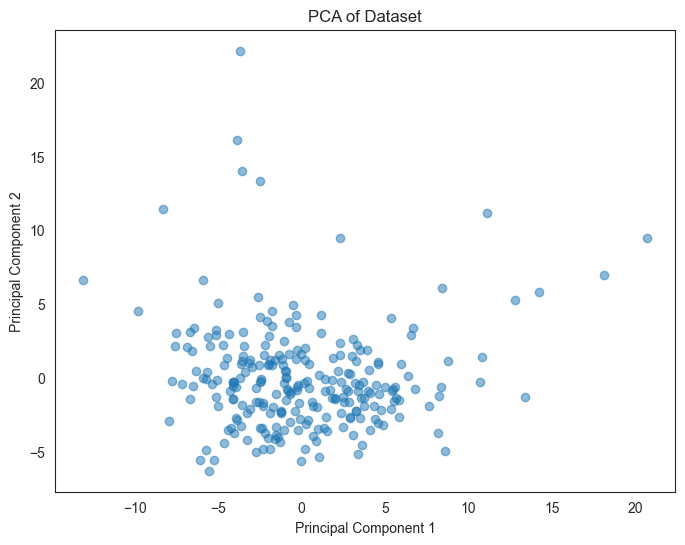

In [ ]:
import matplotlib.pyplot as plt

# Assuming the first two principal components are what we want to plot
plt.figure(figsize=(8, 6))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()


Step 4: Labeling the Plot

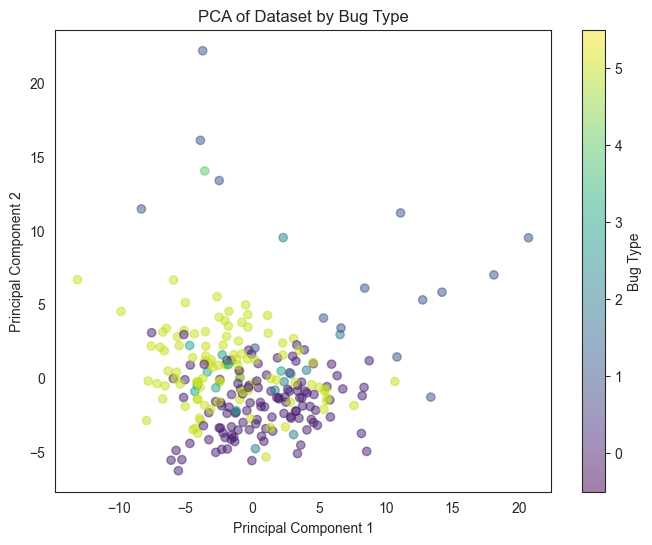

In [ ]:
import pandas as pd

# Assuming 'bug_type' is the column with categorical labels
labels = data['bug_type']  # Ensure this column exists and is included before scaling
label_ids, unique_labels = pd.factorize(labels)

import matplotlib.pyplot as plt

# Plot with these numeric labels
plt.figure(figsize=(8, 6))
scatter = plt.scatter(principalComponents[:, 0], principalComponents[:, 1], alpha=0.5, c=label_ids, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset by Bug Type')
plt.colorbar(scatter, ticks=range(len(unique_labels)), label='Bug Type')
plt.clim(-0.5, len(unique_labels)-0.5)
plt.show()


PCA Plot Analysis of Dataset by Bug Type
Plot Description
Axes:
X-Axis (Principal Component 1): Represents the first principal component derived from your dataset, capturing the maximum variance.
Y-Axis (Principal Component 2): Represents the second principal component.
Points: Each point on the plot symbolizes an individual observation in the dataset (a bug).
Colors: Points are colored based on the bug type, with the color bar on the right mapping these colors to specific bug types encoded as integers.
Observations from the Plot
Main Cluster: A significant clustering of points where various bug types overlap, primarily located near the center of the plot. This suggests shared characteristics among these bug types.
Outliers: Certain points are noticeably distant from the main cluster, indicating unique characteristics distinct from the core group.
Color Gradient: The gradient seen in the colors within the main cluster might indicate gradual changes in bug type characteristics across the plot.
Interpretation
Variance Explained: Principal Component 1 is likely capturing more variance than Principal Component 2, which is typical in PCA. This component is the primary axis of variation.
Separation of Bug Types: Despite some overlap, the presence of distinctly colored groups apart from each other suggests effective dimensionality reduction, revealing potential separations among bug types based on underlying features.
Potential Next Steps

# KMEANS

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Assuming principalComponents is the PCA result you already computed
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(principalComponents)


c:\Users\moesl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


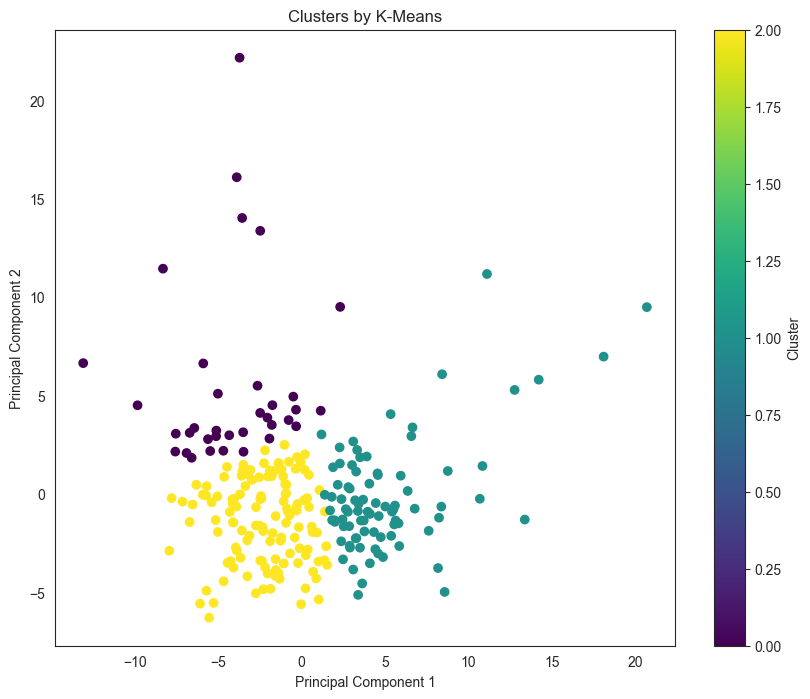

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters by K-Means')
plt.show()


c:\Users\moesl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\moesl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\moesl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\moesl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\

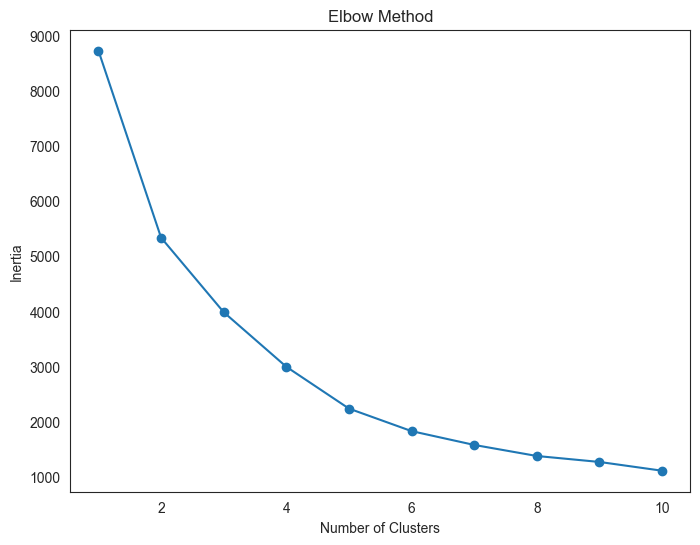

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principalComponents)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


The sharp decline from 1 to around 4 or 5 clusters suggests that each additional cluster within this range significantly helps to better capture the structure of the data

c:\Users\moesl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


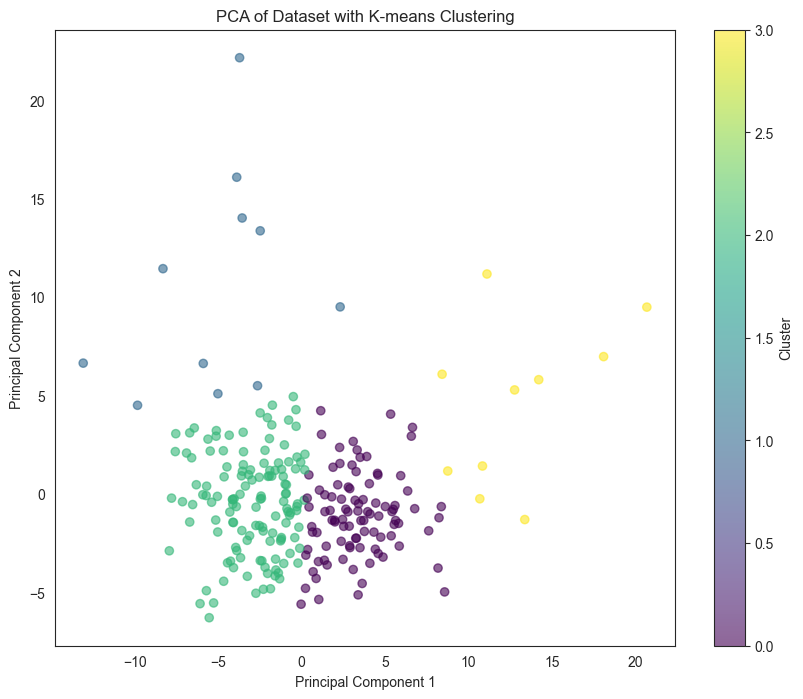

In [ ]:
# Assuming principalComponents is your PCA-transformed data
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(principalComponents)

# Visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset with K-means Clustering')
plt.show()


# 2 Other projections using non-linear methods

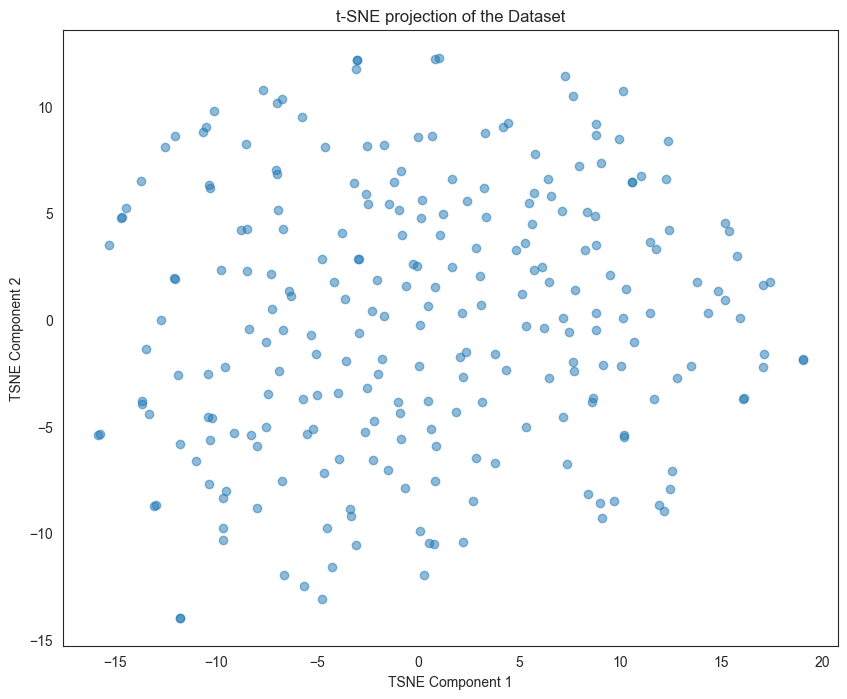

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'scaled_df' is your standardized dataset
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_df)

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('t-SNE projection of the Dataset')
plt.show()


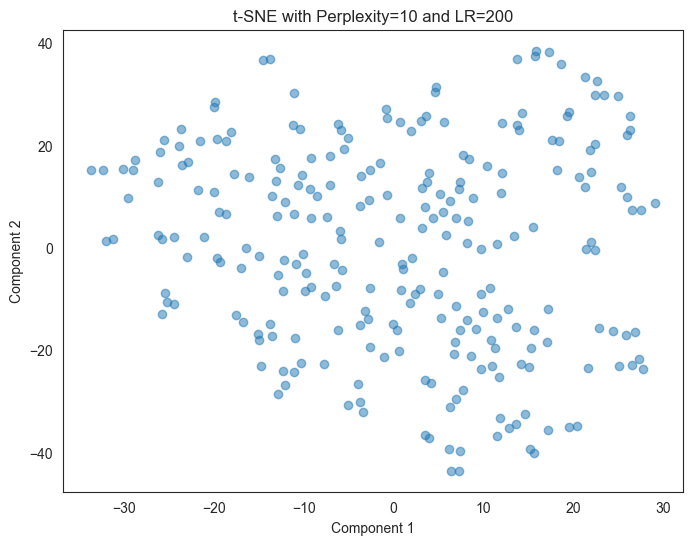

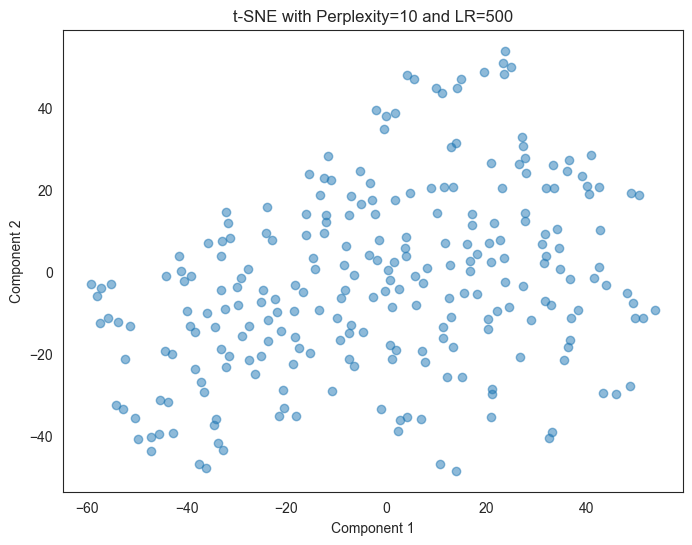

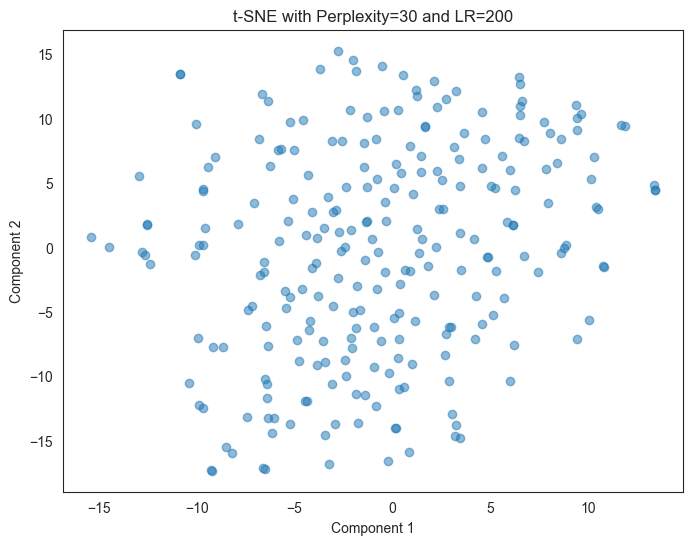

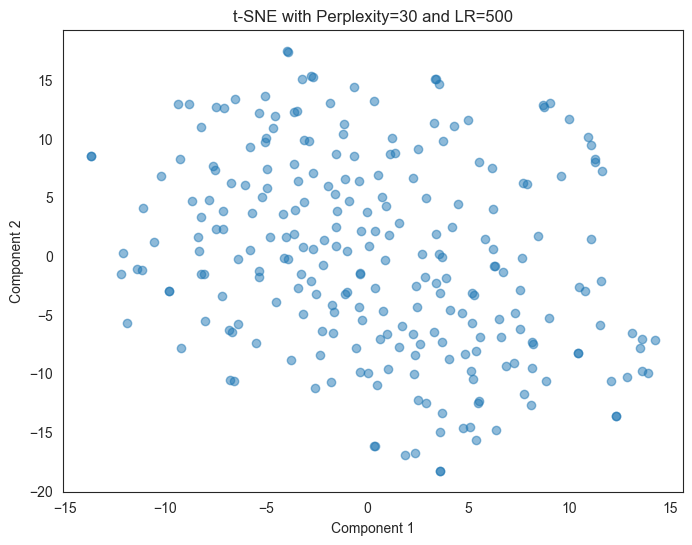

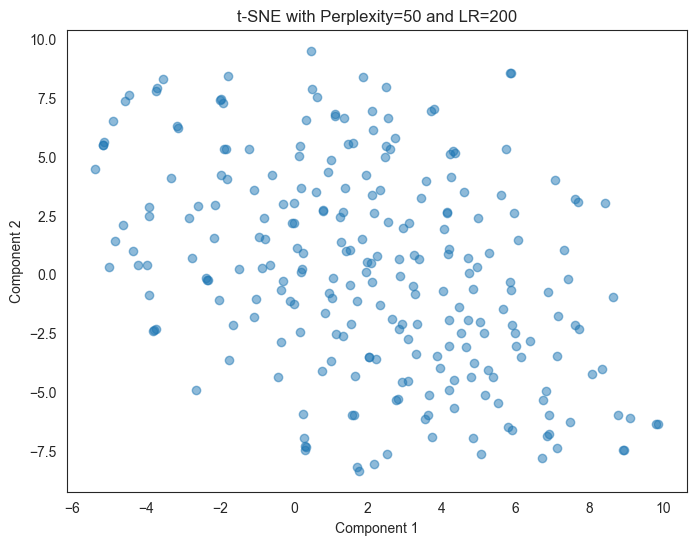

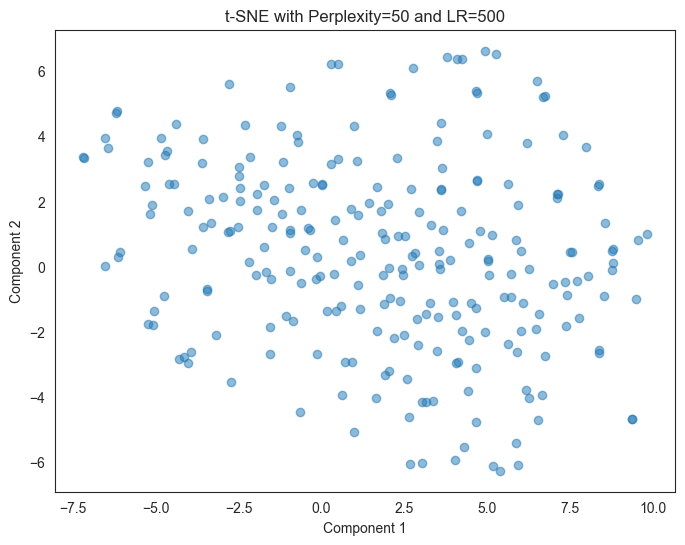

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Parameters set
perplexities = [10, 30, 50]
learning_rates = [200, 500]
iterations = [1000, 2000]

for perplexity in perplexities:
    for learning_rate in learning_rates:
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=iterations[0], init='pca', random_state=42)
        tsne_results = tsne.fit_transform(scaled_df)
        
        plt.figure(figsize=(8, 6))
        plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
        plt.title(f't-SNE with Perplexity={perplexity} and LR={learning_rate}')
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.show()


In [79]:
bugtype = data['bug_type']  # Assuming 'species' is the correct column name



In [80]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the species data to numeric labels
species_encoded = label_encoder.fit_transform(bugtype)


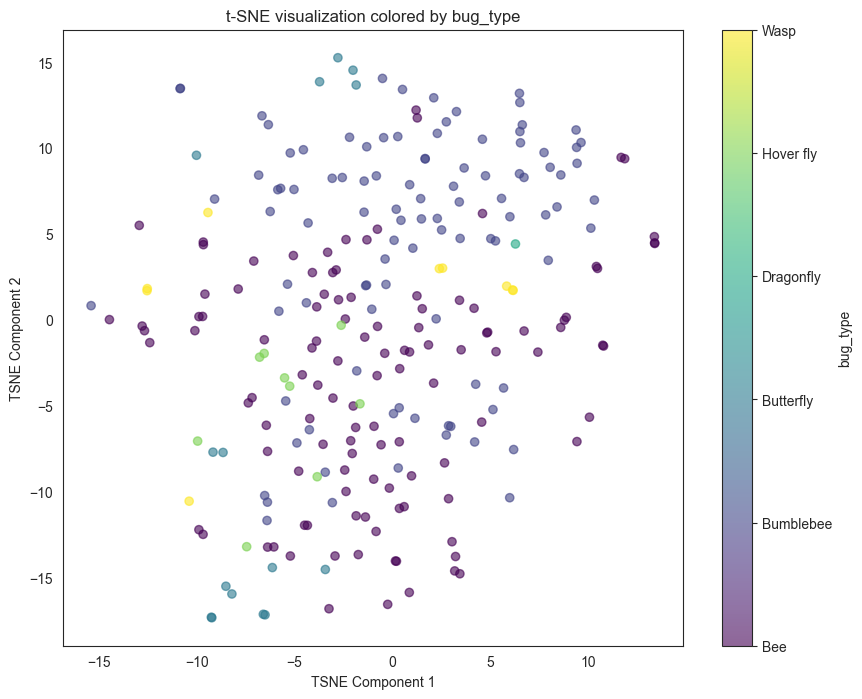

In [81]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming that 'scaled_df' is already defined and is the scaled dataset ready for t-SNE
# Also assuming 'species_encoded' and 'label_encoder' have been defined as shown earlier
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
tsne_results = tsne.fit_transform(scaled_df)

# Visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=species_encoded, cmap='viridis', alpha=0.6)

# Creating a colorbar with appropriate labels for bug_type
cbar = plt.colorbar(scatter, ticks=np.arange(len(label_encoder.classes_)))
cbar.set_ticklabels(label_encoder.classes_)
cbar.set_label('bug_type')

plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('t-SNE visualization colored by bug_type')
plt.show()



In [83]:
import plotly.express as px

# Assuming `tsne_results` is an array from t-SNE and `data['species']` contains the species labels
fig = px.scatter(
    x=tsne_results[:, 0],  # First component
    y=tsne_results[:, 1],  # Second component
    labels={'x': 'TSNE Component 1', 'y': 'TSNE Component 2'},
    color=data['bug_type'],  # This adds color based on the species
    hover_data=[data['bug_type']],  # Additional data to show on hover
    title="Interactive t-SNE visualization colored by bug_type"
)


fig.update_traces(marker=dict(size=5, opacity=0.8))  # Adjust marker appearance
fig.update_layout(legend_title_text='bug_type')  # Update legend title
fig.show()


# ISOMAP METHOD

In [76]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt



In [77]:
# Create an Isomap instance to reduce to 2 components
isomap = Isomap(n_components=2)

# Assuming 'scaled_df' is your scaled dataset prepared earlier
isomap_results = isomap.fit_transform(scaled_df)


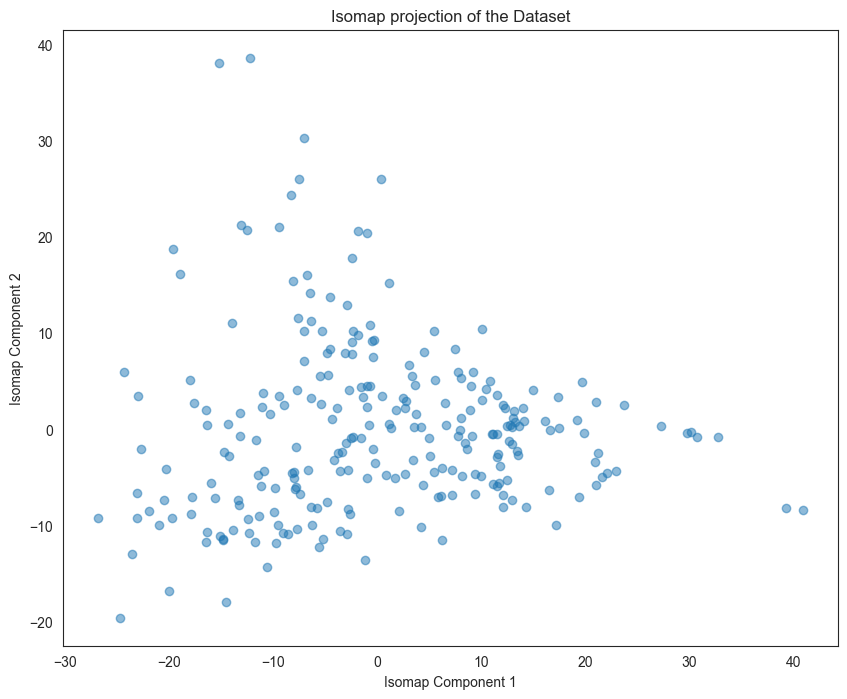

In [78]:
# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(isomap_results[:, 0], isomap_results[:, 1], alpha=0.5)
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.title('Isomap projection of the Dataset')
plt.show()


Distribution: The data points are spread primarily along the first component (horizontal axis), with a range that extends further along this axis than the second component (vertical axis). This suggests that the first component captures a more significant portion of the data's variance.

Clustering: There appears to be a dense cluster in the center, with some outliers spread around this central region. The clustering pattern may indicate groups of similar data points, suggesting potential inherent groupings in the data.

Outliers: Several points lie far from the main cluster. These outliers could represent unique or anomalous data points that are significantly different from the majority of the 

Dimensionality Reduction: Isomap has effectively reduced the dimensionality of the dataset while attempting to preserve the geodesic distances between points. The spread and clustering patterns observed might help in identifying relationships and groups that are not evident in the higher-dimensional space.

In [85]:
from sklearn.cluster import KMeans

# Choose the number of clusters (k) based on your analysis or domain knowledge
k = 3  # Example: 3 clusters; adjust based on your specific needs or insights from the elbow method

# Create a KMeans instance with k clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit KMeans on the Isomap results
cluster_ids = kmeans.fit_predict(isomap_results)

# Now `cluster_ids` contains the cluster label for each data point


c:\Users\moesl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



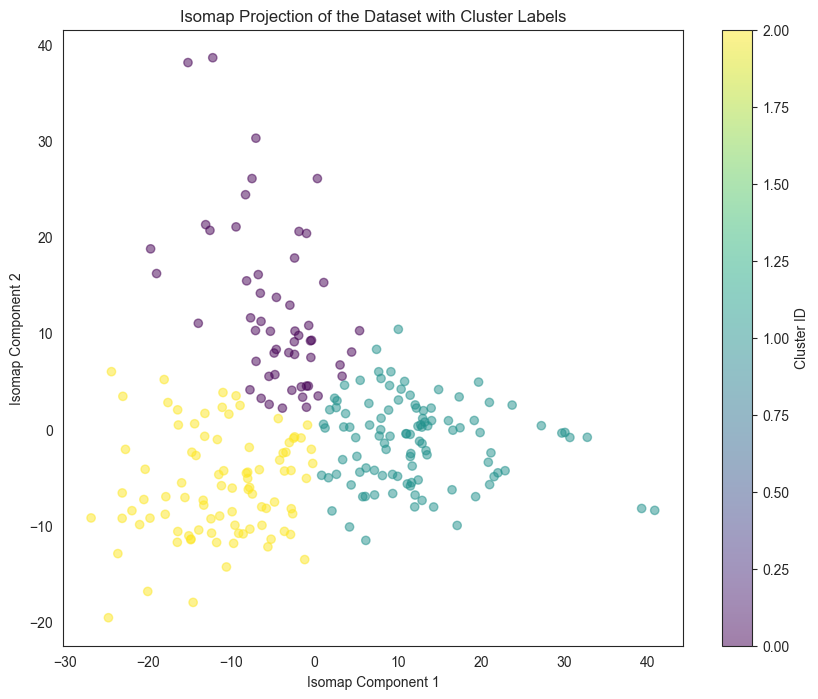

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
scatter = plt.scatter(isomap_results[:, 0], isomap_results[:, 1], c=cluster_ids, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Cluster ID')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.title('Isomap Projection of the Dataset with Cluster Labels')
plt.show()


The plot shows three distinct clusters, each represented by a different color. This visualization clearly distinguishes between the groups, suggesting that the Isomap reduction has preserved some intrinsic structures within the data.

The yellow, green, and purple clusters each occupy different regions of the plot. The separation between these clusters indicates that the Isomap and K-means clustering were successful in identifying distinct groups based on the underlying data.

The spread of the clusters along the principal components suggests that Isomap's attempt to preserve geodesic (non-linear) distances has resulted in meaningful group separations. This can be especially valuable if the original high-dimensional space had non-Euclidean or manifold-like structures.